<a href="https://colab.research.google.com/github/camille2019/NLP/blob/main/Updated_Keyword_Count_Capital_Trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Women-Capital-Trial-Analysis'...
ssh: Could not resolve hostname https: Name or service not known
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [1]:
import numpy as np
import sys
import re
import os


In [101]:
from nltk.util import ngrams

In [2]:
import pandas as pd

In [3]:
keywords_hypersexual = ['busty','flaunting','appealing','short skirt','low cut',
'tight fitting','figure hugging','revealing','bra','panty','underwear',
'lingerie','teddy','slut','whore','bimbo', 'floozie', 'sex', 'skank','bitch','jezebel',
'temptress','tease','lure','entice','flirt','seduc' ,'affair' ,'adulter', 'promiscu','mistress',
'betray', 'charm', 'sexy','cougar','attractive','glamor','breast','cleavage','booty','ass']

In [6]:
keywords_pathologize = ['bitch','calculating','cold','irrational',
'hysteri', 'inhuman', 'unnatural', 'unstable', 'scheming', 'fake',
'deranged','tears', 'crying', 'unemotional', 'uncaring', 'liar',
  'manipulative' , 'insincere' , 'lack of empathy', 'angry', 'not crying',
                        'malinger', 'uncontrollable'
]

In [8]:
keywords_sexuality_gender =[
    'bad mother' , 'maternal','nurture', 'feminine',
'cold','uncaring','virgin','pure', 'family-oriented','physically attractive',
'sacrificial','homemaker','unfriendly','wife','sexual appeal','unemotional',
'abandonment' ,'neglect' ,'child abuse','overbearing','masculine' ,'manly',
'selfish','unnatural','assertive','ugly','lady','woman' ,'butch','aggressive',
'confrontational','violent','emotionally abusive','unfeeling','bitch','dyke','lesbian',
'bisexual','gay','queer'
]

In [10]:
keywords_racial_tropes = ['ape', 'savage', 'negro', 'feral', 'lazy', 'brute', 'angry', 'untamable' 'large', 'gang', 'wolves', 'jackal', 'hyenaa', 'dog' ]

In [11]:
keywords_race_gender_blackwomen = ['lazy', 'welfare queen', 'baby mama', 'mammy','matriarch',
'resistant', 'angry','belligerent','over sexed','thug','used to violence'
'sexual predator']

keywords_race_gender_brownwomen = ['culture','customs','different','diverse','foreign',
'exotic','accent','steal','english','taking over','foreign','backward',
'community','dirty' ,'ethnic','infiltration' ,'welfare'
]

keywords_immigration = ['alien',
'foreign','backward','home','citizenship','unlawful presence',
'american hospitality', 'wetback', 'illegal', 'dirty',
'untrustworthy','exotic','diverse','different','ethnic','accent',
'english','custom','culture', 'steal',
'taking over',
'infiltration', 'border', 'home'
]

keywords_poverty_rural = ['poor', 'welfare', 'poverty', 'lazy', 'cheap',
'lack of opportunity','contribution to society', 'drugs', 'cocaine', 'speed', 'marijuana',
'heroin', 'trailer trash', 'dirty' ,'disorganized', 'messy', 'greedy',
'materialistic','acquisitive', 'food stamps'
]



In [13]:
keywords_discredit = ['liar', 'lie','manipulative', 'unbelievable', 'make believe',
'exaggerat', 'unreliable', 'inconsistent', 'hysterical', 'corroborate', 'atypical',
'if it happened', 'asking for it', 'asked for it', 'cries wolf', 'had it coming'
]


In [14]:
mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']


In [15]:
keywords_lists = [keywords_hypersexual,keywords_pathologize, keywords_sexuality_gender,
                  keywords_racial_tropes, keywords_race_gender_blackwomen, keywords_race_gender_brownwomen,
                  keywords_immigration, keywords_poverty_rural, keywords_discredit

                  ]

In [17]:
import numpy as np
import sys
import re


# keywords = ["adulter", "affair", "prostitut", "lover", "seduc", "flirt", "intercourse", "sex", "orgasm", "abort", "lesbian", "homosexual", "sin", "kiss", "panty", "panties", "bra",
#             "naked", "porn", "masturbat", "fellatio"]

# keywords = ["lipstick", "manicure", "pretty", "ugly", "attractive", "unattractive", "makeup", "make-up", "make up"]




In [16]:
#Andrea's code

def locate_paragraph_with_keyword(keyword, tokenized_doc, window):
    mask = np.char.startswith(tokenized_doc, keyword)
    matches = np.where(mask)[0]
    for m in matches:
        # keep only the a-zA-Z in the token
        token = tokenized_doc[m]
        if keyword == "bra":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only != keyword:
                continue
        elif keyword == "sin":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only not in ["sin", "sins", "sinned"]:
                continue
        token_span = tokenized_doc[max(0, m-window):min(len(tokenized_doc)-1, m+window)]
        paragraph = " ".join(token_span)
        yield m, paragraph

In [18]:
#Andrea's code
def count_keyword_matches(keyword, tokenized_doc, window):
    mask = np.char.startswith(tokenized_doc, keyword)
    matches = np.where(mask)[0]
    paragraphs = []
    # count = len(matches)
    for m in matches:
        # keep only the a-zA-Z in the token
        token = tokenized_doc[m]

        if keyword == "bra":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only != keyword:
                continue

        elif keyword == "sin":
            token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
            if token_alphabet_only not in ["sin", "sins", "sinned", 'sinners']:
                continue
        token_span = tokenized_doc[max(0, m-window):min(len(tokenized_doc)-1, m+window)]
        paragraph = " ".join(token_span)
        paragraphs.append(paragraph)

    count = len(paragraphs)
    return count, paragraphs

In [20]:
def keyword_count2(directory, file_name, word):
  count = 0
  full_path = directory + '/' + file_name
  passages = []
  with open(full_path, 'r',errors='ignore') as f:
      for line in f:
          words = line.lower().split()
          for i in words:
            if ( word in i):
                #reduce noise of 'sin' and 'bra'
              if (word =='bra') & (i != word):
                  continue
              elif (word =='sin') & (i not in ["sin", "sins", "sinned", 'sinner', 'sinners']):
                  continue
              else:
                target_index = words.index(i)
                #get 60 words before keyword
                start = max(0, target_index - 60)

                #get 60 words after keyword
                end = min(len(words), target_index + 60 + 1)
                list_passage = words[start:end]




                passages.append(" ".join(list_passage))
                count=count+1


  # if count==0:
  #   count = partial_wordcount
  return count, passages

In [108]:
#count using built in str.count()

def keyword_count3(directory, file_name, word):
  count = 0
  full_path = directory + '/' + file_name
  passages = []
  with open(full_path, 'r',errors='ignore') as f:
    read_file = f.read()
    word_count = read_file.count(word)

    if word_count > 0 :
      target_index = read_file.index(word)
      #get 60 words before keyword
      start = max(0, target_index - 60)

                  #get 60 words after keyword
      end = min(len(read_file), target_index + 60 + 1)
      list_passage = read_file[start:end]
      passages.append(" ".join(list_passage))

  return word_count, passages

In [142]:
# def locate_keyword(keyword, tokenized_doc):
#     mask = np.char.startswith(tokenized_doc, keyword)
#     matches = np.where(mask)[0]
#     for m in matches:
#         # keep only the a-zA-Z in the token
#         token = tokenized_doc[m]
#         if keyword == "bra":
#             token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
#             if token_alphabet_only != keyword:
#                 continue
#         elif keyword == "sin":
#             token_alphabet_only = re.sub(r'[^a-zA-Z]', '', token)
#             if token_alphabet_only not in ["sin", "sins", "sinned"]:
#                 continue
#         token_span = tokenized_doc[max(0, m-window):min(len(tokenized_doc)-1, m+window)]
#         paragraph = " ".join(token_span)
#         yield m, paragraph

In [22]:
transcript_path = "/content/transcripts_txt"
# transcript_path = "/content/men"

keywords = ['adulter', 'affair', 'prostitut', 'lover', 'seduc','flirt', 'intercourse', 'sex', 'orgasm', 'abort', 'lesbian', 'homosexual', 'sin', 'kiss', 'panty', 'bra', 'naked', 'porn', 'masturbat', 'fellatio']


In [25]:
keywords = ['adulter', 'affair', 'prostitut', 'lover', 'seduc','flirt', 'intercourse', 'sex', 'orgasm', 'abort', 'lesbian', 'homosexual', 'sin', 'kiss', 'panty', 'bra', 'naked', 'porn', 'masturbat', 'fellatio']

In [28]:
keywords_dict= {
    'Hypersexualize': keywords_hypersexual,
    'Pathologize' : keywords_pathologize,
    'Discredit': keywords_discredit,
    'Sexuality and Gender':keywords_sexuality_gender,
    'Racial Tropes':keywords_racial_tropes,
    'Gendered Racialization of Black Women': keywords_race_gender_blackwomen,
    'Gendered Racialization of Latina Women':keywords_race_gender_brownwomen,
    'Immigration':keywords_immigration,
    'Ruralality and Poverty' :keywords_poverty_rural,
    'Original keywords':keywords
}



In [145]:
# /content/women/Angelina Rodriguez.txt

In [27]:
df10 = pd.DataFrame(columns= ['document_name', 'keyword', 'keyword_theme','count_method1', 'count_method2'])

passages_dict = pd.DataFrame(columns= ['document_name', 'keyword', 'keyword_theme','keyword_method' , 'passage' ])


In [100]:
df10['keyword'].unique()

array(['busty', 'flaunting', 'appealing', 'short skirt', 'low cut',
       'tight fitting', 'figure hugging', 'revealing', 'bra', 'panty',
       'underwear', 'lingerie', 'teddy', 'slut', 'whore', 'bimbo',
       'floozie', 'sex', 'skank', 'bitch', 'jezebel', 'temptress',
       'tease', 'lure', 'entice', 'flirt', 'seduc', 'affair', 'adulter',
       'promiscu', 'mistress', 'betray', 'charm', 'sexy', 'cougar',
       'attractive', 'glamor', 'breast', 'cleavage', 'booty', 'ass',
       'calculating', 'cold', 'irrational', 'hysteri', 'inhuman',
       'unnatural', 'unstable', 'scheming', 'fake', 'deranged', 'tears',
       'crying', 'unemotional', 'uncaring', 'liar', 'manipulative',
       'insincere', 'lack of empathy', 'angry', 'not crying', 'malinger',
       'uncontrollable', 'Liar', 'lie', 'unbelievable', 'make believe',
       'exaggerat', 'unreliable', 'inconsistent', 'hysterical',
       'corroborate', 'atypical', 'if it happened', 'asking for it',
       'asked for it', 'cries w

In [104]:
df = pd.DataFrame(columns= ['document_name', 'keyword', 'keyword_theme', 'count_method3'])


In [109]:
#Andrea's code (with modifications)

for doc in os.listdir(transcript_path):
# if (os.path.splitext(transcript_path)[1].lower() == '.txt'):
  title = doc
  print(title)
  if ".txt" in title:
    doc_path = transcript_path + '/' + doc

    with open(doc_path, "r") as f:
        doc = f.read()
        doc = doc.lower()
    tokenized_doc = doc.split()

    # print(f"defendant\tkeyword\tkeyword_index\tparagraph")

    window = 60

    for keyword_list in keywords_dict.keys():
        print(keyword_list)
        for keyword in keywords_dict[keyword_list]:

            count3, passages3= keyword_count3(transcript_path, title, keyword)

            #save keyword counts
            df2 = pd.DataFrame([[title, keyword, keyword_list,count3]], columns=['document_name', 'keyword', 'keyword_theme', 'count_method3'])
            df = pd.concat([df, df2], ignore_index=True)

            #save passages from keyword counts
            # m1_count = len(paragraphs)
            # doc_name = [title] * m1_count
            # k = [keyword] *m1_count
            # k_method = ['Method 1'] *m1_count
            # k_theme = [keyword_list] *m1_count
            # method1_pars =  pd.DataFrame({'document_name':doc_name ,'keyword': k , 'keyword_theme': k_theme, 'keyword_method': k_method, 'passage': paragraphs})
            # passages_dict = pd.concat([passages_dict, method1_pars], ignore_index=True)


            # m2_count = len(passages)
            # doc_name = [title] * m2_count
            # k = [keyword] *m2_count
            # k_method = ['Method 2'] *m2_count
            # k_theme = [keyword_list] *m2_count
            # method2_pars = pd.DataFrame({'document_name':doc_name, 'keyword': k,  'keyword_theme': k_theme, 'keyword_method': k_method, 'passage': passages })
            # passages_dict = pd.concat([passages_dict, method2_pars], ignore_index=True)


            m3_count = len(passages3)
            doc_name = [title] * m3_count
            k = [keyword] *m3_count
            k_method = ['Method 3'] *m3_count
            k_theme = [keyword_list] *m3_count
            method3_pars = pd.DataFrame({'document_name':doc_name, 'keyword': k,  'keyword_theme': k_theme, 'keyword_method': k_method, 'passage': passages3 })
            passages_dict = pd.concat([passages_dict, method3_pars], ignore_index=True)

Maureen McDermott.txt
Hypersexualize
Pathologize
Discredit
Sexuality and Gender
Racial Tropes
Gendered Racialization of Black Women
Immigration
Ruralality and Poverty
Original keywords
Gendered Racialization of Latino Women
Blanche Taylor Moore.txt
Hypersexualize
Pathologize
Discredit
Sexuality and Gender
Racial Tropes
Gendered Racialization of Black Women
Immigration
Ruralality and Poverty
Original keywords
Gendered Racialization of Latino Women
John Allen.txt
Hypersexualize
Pathologize
Discredit
Sexuality and Gender
Racial Tropes
Gendered Racialization of Black Women
Immigration
Ruralality and Poverty
Original keywords
Gendered Racialization of Latino Women
Susan Eubanks.txt
Hypersexualize
Pathologize
Discredit
Sexuality and Gender
Racial Tropes
Gendered Racialization of Black Women
Immigration
Ruralality and Poverty
Original keywords
Gendered Racialization of Latino Women
Cathy Sarinana.txt
Hypersexualize
Pathologize
Discredit
Sexuality and Gender
Racial Tropes
Gendered Racializatio

In [110]:
df.to_csv('m3_all_themes_keyword_counts.csv')

In [105]:
passages_dict

,document_name,keyword,keyword_theme,keyword_method,passage
0,Maureen McDermott.txt,appealing,Hypersexualize,Method 1,deal with it. mr. ingber: i'm sure despite the...
1,Maureen McDermott.txt,appealing,Hypersexualize,Method 1,to you that the main argument that they will m...
2,Maureen McDermott.txt,appealing,Hypersexualize,Method 2,deal with it. mr. ingber: i'm sure despite the...
3,Maureen McDermott.txt,appealing,Hypersexualize,Method 2,to you that the main argument that they will m...
4,Maureen McDermott.txt,revealing,Hypersexualize,Method 1,the bailiff: when they pick him up they will b...
...,...,...,...,...,...
430451,Lisa Chamberlin.txt,naked,Original keywords,Method 1,mr. saucier: i haven't said anything. 17 the c...
430452,Lisa Chamberlin.txt,naked,Original keywords,Method 1,the continuous pounding that he got over the p...
430453,Lisa Chamberlin.txt,naked,Original keywords,Method 2,combination of the safe and just can't do it. ...
430454,Lisa Chamberlin.txt,naked,Original keywords,Method 2,mr. saucier: i haven't said anything. 17 the c...


In [ ]:
#Andrea's code (with modifications)

for doc in os.listdir(transcript_path):
# if (os.path.splitext(transcript_path)[1].lower() == '.txt'):
  title = doc
  print(title)
  if ".txt" in title:
    doc_path = transcript_path + '/' + doc

    with open(doc_path, "r") as f:
        doc = f.read()
        doc = doc.lower()
    tokenized_doc = doc.split()

    # print(f"defendant\tkeyword\tkeyword_index\tparagraph")

    window = 60

    for keyword_list in keywords_dict.keys():
        print(keyword_list)
        for keyword in keywords_dict[keyword_list]:


            # for index, paragraph in save_paragraph_keyword_lists(keyword, tokenized_doc, window):

            #keyword_list = string name of category of keywords

            count1, paragraphs = count_keyword_matches(keyword, tokenized_doc, window)
            count2, passages = keyword_count2(transcript_path, title, keyword)

            count3, passages3= keyword_count3(transcript_path, title, keyword)

            #save keyword counts
            df2 = pd.DataFrame([[title, keyword, keyword_list,count1, count2]], columns=['document_name', 'keyword', 'keyword_theme', 'count_method1', 'count_method2'])
            df10 = pd.concat([df10, df2], ignore_index=True)

            #save passages from keyword counts
            m1_count = len(paragraphs)
            doc_name = [title] * m1_count
            k = [keyword] *m1_count
            k_method = ['Method 1'] *m1_count
            k_theme = [keyword_list] *m1_count
            method1_pars =  pd.DataFrame({'document_name':doc_name ,'keyword': k , 'keyword_theme': k_theme, 'keyword_method': k_method, 'passage': paragraphs})
            passages_dict = pd.concat([passages_dict, method1_pars], ignore_index=True)


            m2_count = len(passages)
            doc_name = [title] * m2_count
            k = [keyword] *m2_count
            k_method = ['Method 2'] *m2_count
            k_theme = [keyword_list] *m2_count
            method2_pars = pd.DataFrame({'document_name':doc_name, 'keyword': k,  'keyword_theme': k_theme, 'keyword_method': k_method, 'passage': passages })
            passages_dict = pd.concat([passages_dict, method2_pars], ignore_index=True)


            m3_count = len(passages3)
            doc_name = [title] * m3_count
            k = [keyword] *m3_count
            k_method = ['Method 3'] *m3_count
            k_theme = [keyword_list] *m3_count
            method3_pars = pd.DataFrame({'document_name':doc_name, 'keyword': k,  'keyword_theme': k_theme, 'keyword_method': k_method, 'passage': passages })
            passages_dict = pd.concat([passages_dict, method3_pars], ignore_index=True)



In [33]:
df10['keyword_theme']= df10['keyword_theme'].replace('Gendered Racialization of Lation Women', 'Gendered Racialization of Latina Women')

In [31]:
df10.shape

(10976, 5)

In [ ]:
df10

In [34]:
df10.to_csv('all_themes_keyword_counts.csv')

In [151]:
df10.document_name.unique()

array(['Maureen McDermott.txt', 'Blanche Taylor Moore.txt',
       'John Allen.txt', 'Susan Eubanks.txt', 'Cathy Sarinana.txt',
       'Belinda Magana.txt', 'Angelina Rodriguez.txt', 'Tiffany Moss.txt',
       'Manling Williams.txt', 'Kimberly Cargill.txt',
       'Donna Roberts.txt', 'Brenda Andrew.txt', 'Michelle Michaud.txt',
       'Celeste Carrington.txt', 'Kerry Dalton.txt', 'Socorro Caro.txt',
       'Cynthia Coffman.txt', 'Patricia Blackmon.txt',
       'Veronica Gonzales.txt', 'Darlie Routier.txt',
       'Wendi Andriano.txt', 'Sammantha Allen.txt', 'Taylor Parker.txt',
       'James Pavatt.txt', 'Antoinette Frank.txt',
       'Christie Michelle Scott.txt', 'Tierra Capri Gobble.txt',
       'Cherie Rhoades.txt', 'Tanya Nelson.txt', 'Erica Sheppard.txt',
       'Brittany Holberg.txt', 'Michelle Tharp.txt', 'Margaret Allen.txt',
       'Lisa Graham.txt', 'Janeen Snyder.txt', 'Lorraine Hunter.txt',
       'Shawna Forde.txt', 'Maria Alfaro.txt', 'Heather Keaton.txt',
       'Tina 

In [35]:
mask = df10['document_name'].isin(mens_transcript_titles)
women_only = df10[~mask]

In [38]:
keywords_dict.keys()

dict_keys(['Hypersexualize', 'Pathologize', 'Discredit', 'Sexuality and Gender', 'Racial Tropes', 'Gendered Racialization of Black Women', 'Gendered Racialization of Lation Women', 'Immigration', 'Ruralality and Poverty', 'Original keywords'])

In [39]:
value_to_move = keywords_dict.pop('Gendered Racialization of Lation Women')
keywords_dict['Gendered Racialization of Latino Women'] = value_to_move

In [114]:
value_to_move = keywords_dict.pop('Gendered Racialization of Latino Women')
keywords_dict['Gendered Racialization of Latina Women'] = value_to_move

In [53]:
women_only['keyword_theme'].unique()

array(['Hypersexualize', 'Pathologize', 'Discredit',
       'Sexuality and Gender', 'Racial Tropes',
       'Gendered Racialization of Black Women',
       'Gendered Racialization of Latina Women', 'Immigration',
       'Ruralality and Poverty', 'Original keywords'], dtype=object)

Graphs Depicting Keyword Counts of 10 Themes of Keywords (including our original keyword list liste as "Original keywords)



Findings of initial keyword counts by theme:



Hypersexualizing Keywords
*   Very high counts with possible noise for two words "ass" (20898, 36124) and "sex" (5818, 6166) respectuve counts across methods 1 and 2
*   Aside from these all other keyword counts below 1000

Pathologizing Keywords
* less variation in keyword counts within the same method
* high variation across 2 methods for the word 'liar' 3k vs ~400


Discrediting Keywords
*  'Liar' is capitalized resulting in 0 count for both methods (true count would be the same as in Pathologizing section)


Sexuality and Gender Keywords
* 'woman' 'wife' 'virgin' 'lady' have the highest counts each above 2k each
* 'violent' and 'cold' also high count keywords
* "Virgin" could be influenced by state of Virginia and 'cold' may be used outside of the context of the defendant's demeanor as its used here


Racial Stereotype Keywords
* 'large' highest count keyword over 2k with others significantly lower
* second highest is 'dog' may need to explore context further to see if use is relevant

Gendered + Racialized Stereotypes- Black Women Keywords
* 'angry' highest count keyword in this cateogry


Gendered + Racialized Stereotypes- Latina Women Keywords
* 'different' is the highest count keyword with over 14k across both methods
  * high noise keyword
* 'community' second highest in this category


Immigration
* 'different' is used again here and is the highest count keyword
* 'home' also high count
  *high noise keywords
* other keyword counts are very low below 100
* 'accent' and 'english' typo

Rural and Poverty Keywords
* 'drugs' had highest count over 4k
* drug related keywords 'speed' 'marijuana' 'cocaine' have next highest counts
* 'welfare' 'poor' and 'dirty' highest count for non-drug related terms


Overall Observations:
* Keyphrases with multiple words have 0 matches using either method, low exact matches
  * ie Pathologizing ('lack of empathy', 'not crying'), Discrediting ('asked for it', 'asking for it')

* some keywords seem like the may be too vauge, have other meanings, have too much variance in their use to provide useful info, consider removing?
  - 'different'
  - 'community'
  - 'large'
  - 'dog'
  - 'angry
  - 'home'
  - 'woman'
  - 'lady'
  






In [115]:
keywords_dict.keys()

dict_keys(['Hypersexualize', 'Pathologize', 'Discredit', 'Sexuality and Gender', 'Racial Tropes', 'Gendered Racialization of Black Women', 'Immigration', 'Ruralality and Poverty', 'Original keywords', 'Gendered Racialization of Latina Women'])

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

Method 1 keyword calcualtion across sets of keywords

In [122]:
df10['document_name'].unique()

array(['Maureen McDermott.txt', 'Blanche Taylor Moore.txt',
       'John Allen.txt', 'Susan Eubanks.txt', 'Cathy Sarinana.txt',
       'Belinda Magana.txt', 'Angelina Rodriguez.txt', 'Tiffany Moss.txt',
       'Manling Williams.txt', 'Kimberly Cargill.txt',
       'Donna Roberts.txt', 'Brenda Andrew.txt', 'Michelle Michaud.txt',
       'Celeste Carrington.txt', 'Kerry Dalton.txt', 'Socorro Caro.txt',
       'Cynthia Coffman.txt', 'Patricia Blackmon.txt',
       'Veronica Gonzales.txt', 'Darlie Routier.txt',
       'Wendi Andriano.txt', 'Sammantha Allen.txt', 'Taylor Parker.txt',
       'James Pavatt.txt', 'Antoinette Frank.txt',
       'Christie Michelle Scott.txt', 'Tierra Capri Gobble.txt',
       'Cherie Rhoades.txt', 'Tanya Nelson.txt', 'Erica Sheppard.txt',
       'Brittany Holberg.txt', 'Michelle Tharp.txt', 'Margaret Allen.txt',
       'Lisa Graham.txt', 'Janeen Snyder.txt', 'Lorraine Hunter.txt',
       'Shawna Forde.txt', 'Maria Alfaro.txt', 'Heather Keaton.txt',
       'Tina 

In [126]:
mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']


In [129]:
d = df10[df10['document_name'] in mens_transcript_titles]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

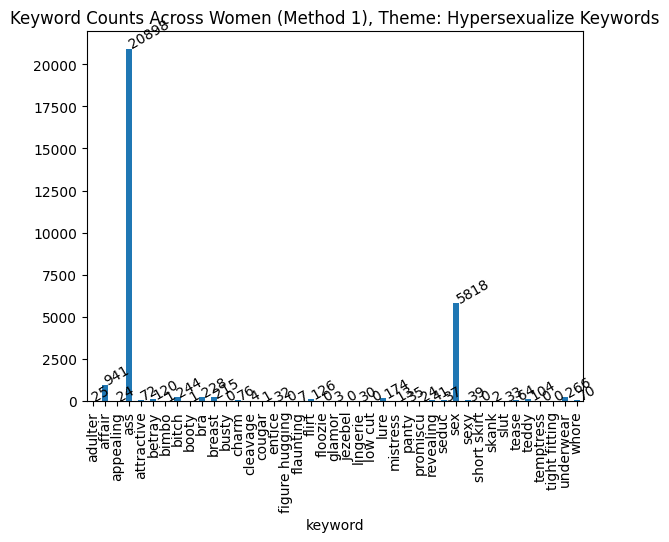

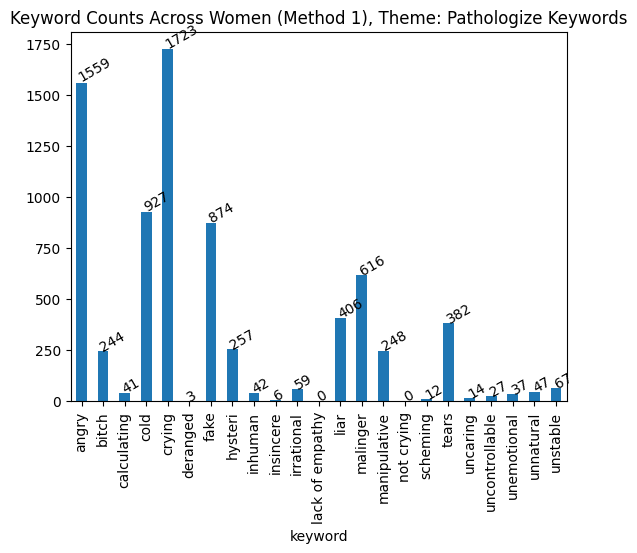

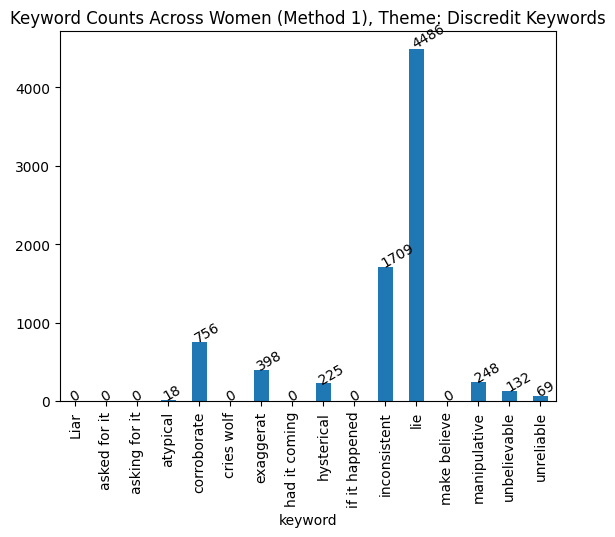

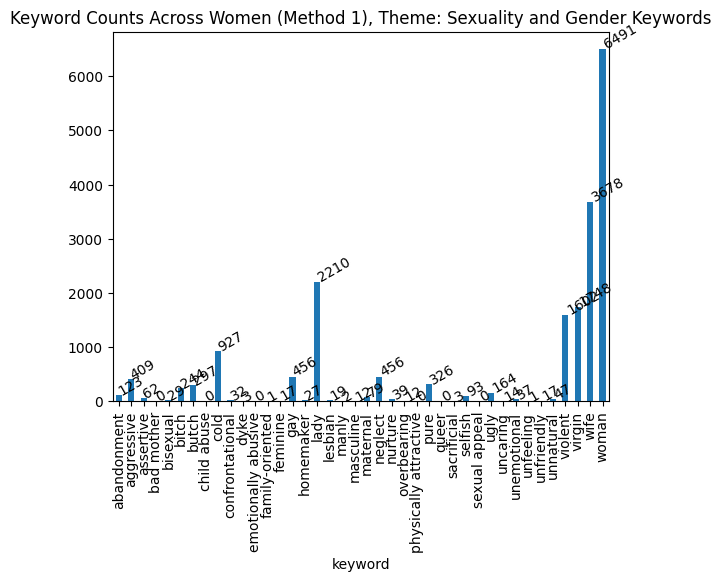

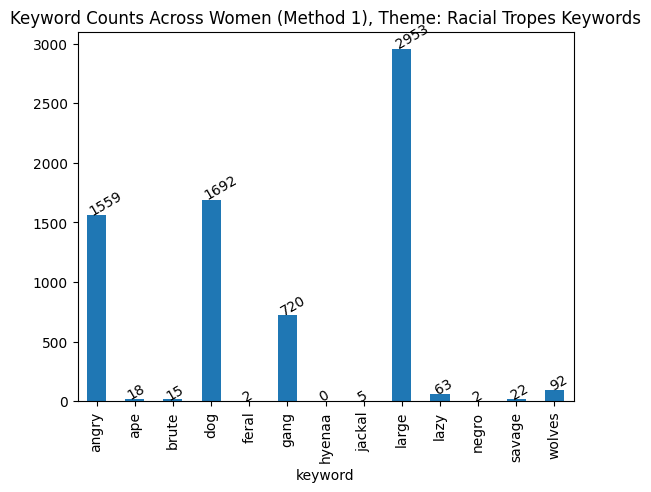

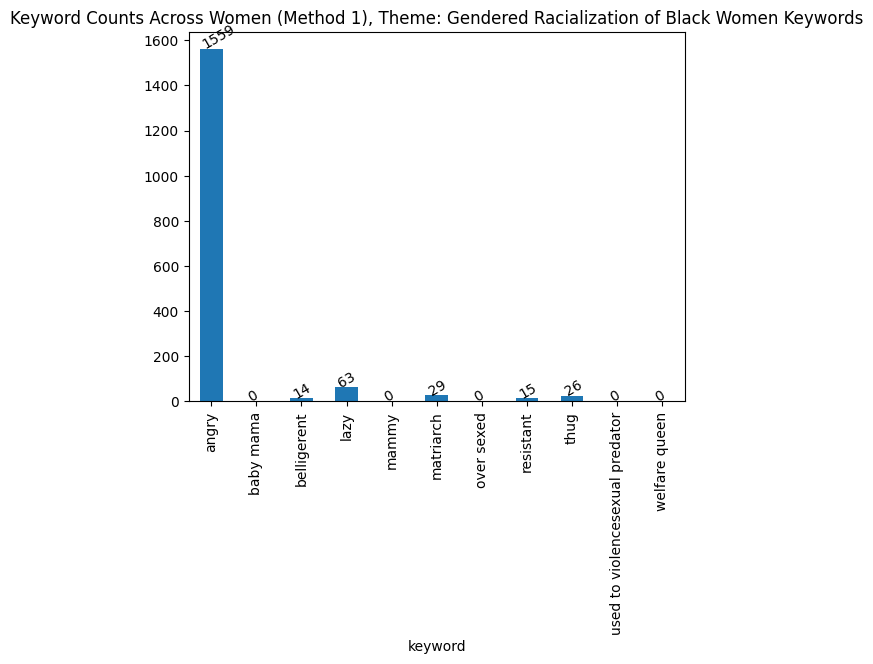

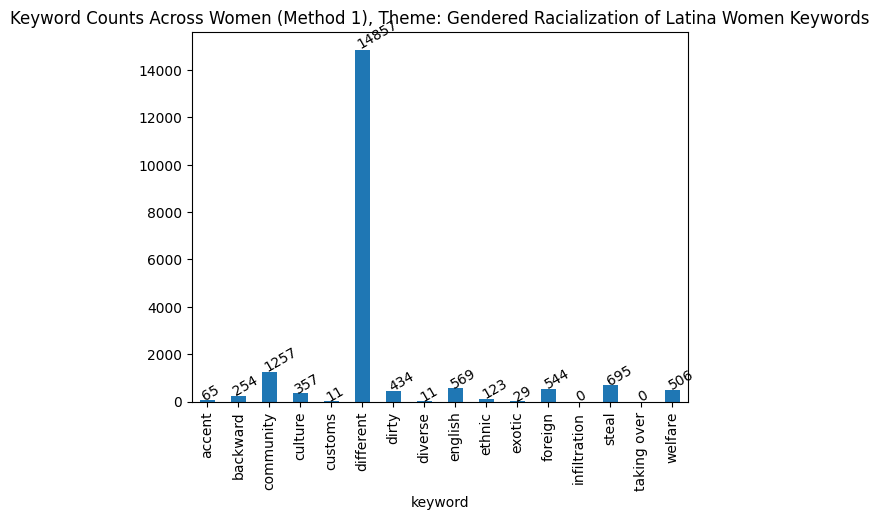

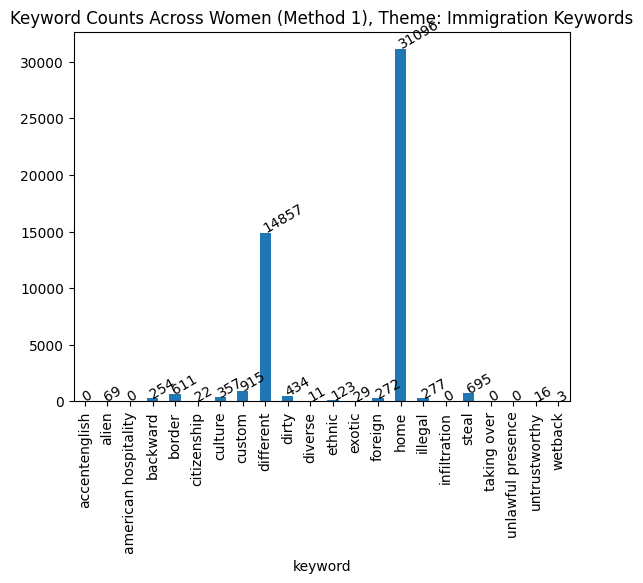

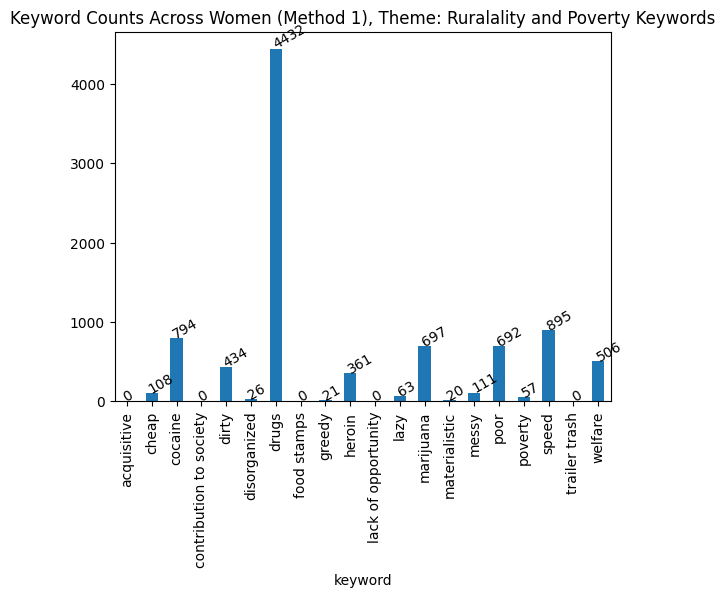

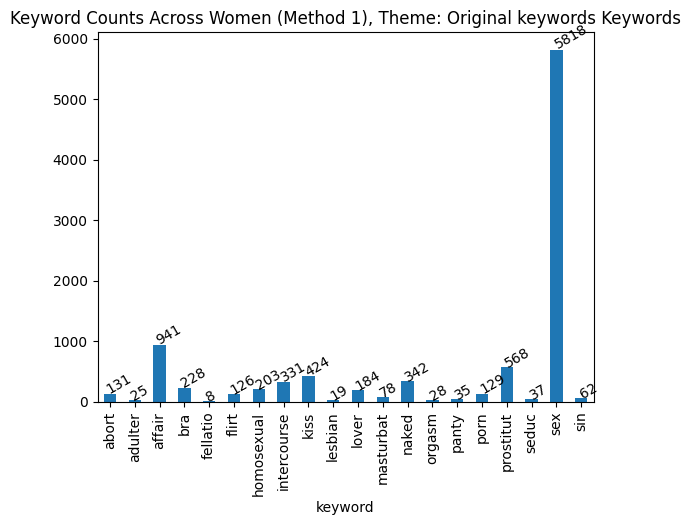

In [133]:

mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']

mask = df10['document_name'].isin(mens_transcript_titles)
women_only = df10[~mask]


for k in women_only.keyword_theme.unique():
  temp = women_only[women_only['keyword_theme'] == k]
  ax = temp.groupby('keyword')['count_method1'].sum().plot(kind='bar',  title= 'Keyword Counts Across Women (Method 1), Theme: ' +k +  ' Keywords')
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
  plt.show()

Method 2 keyword calcualtion across sets of keywords

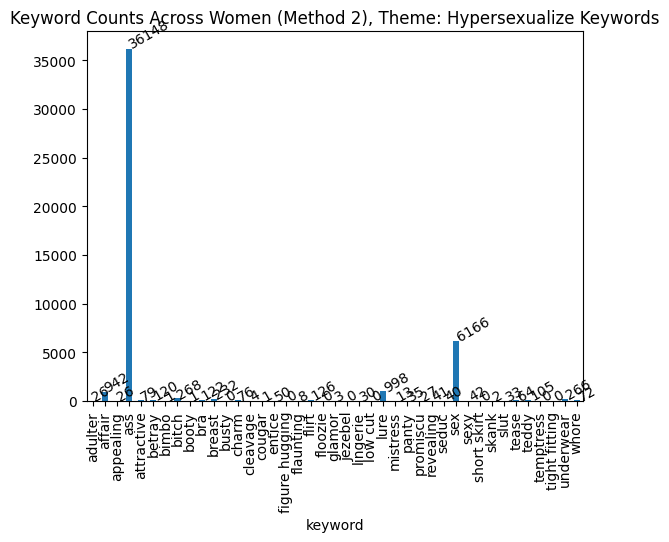

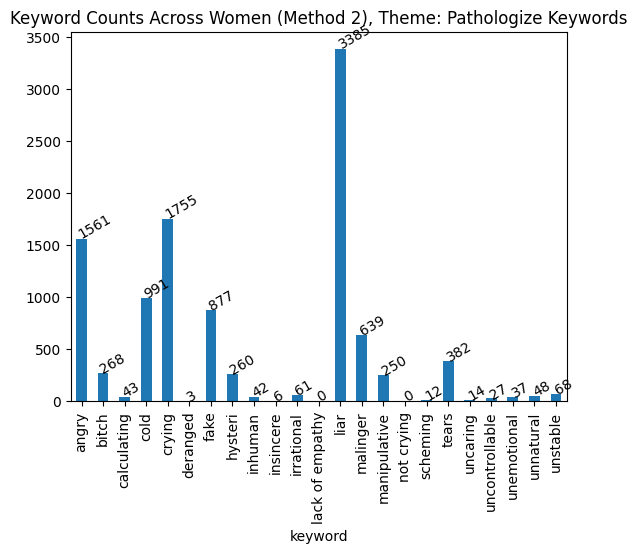

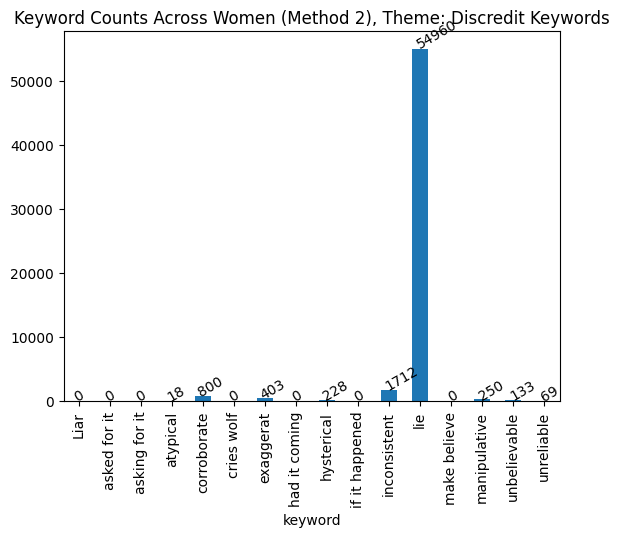

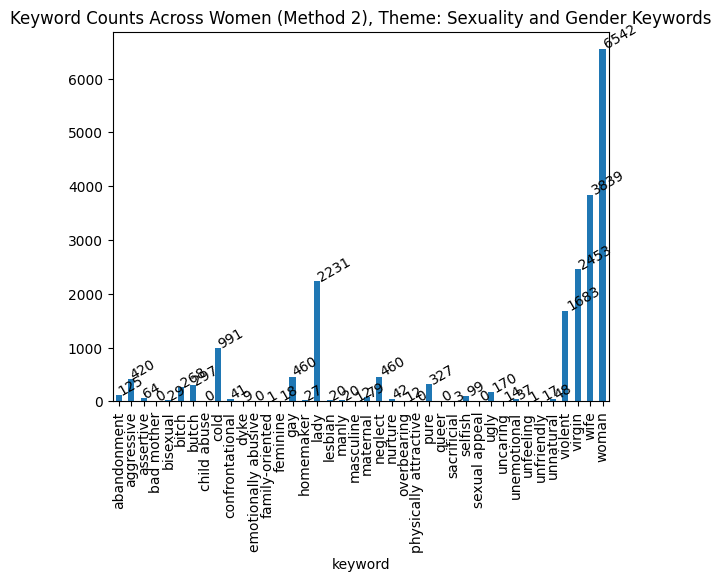

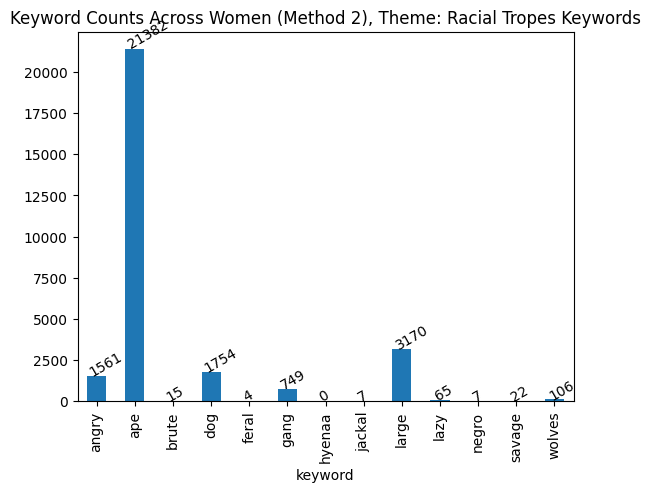

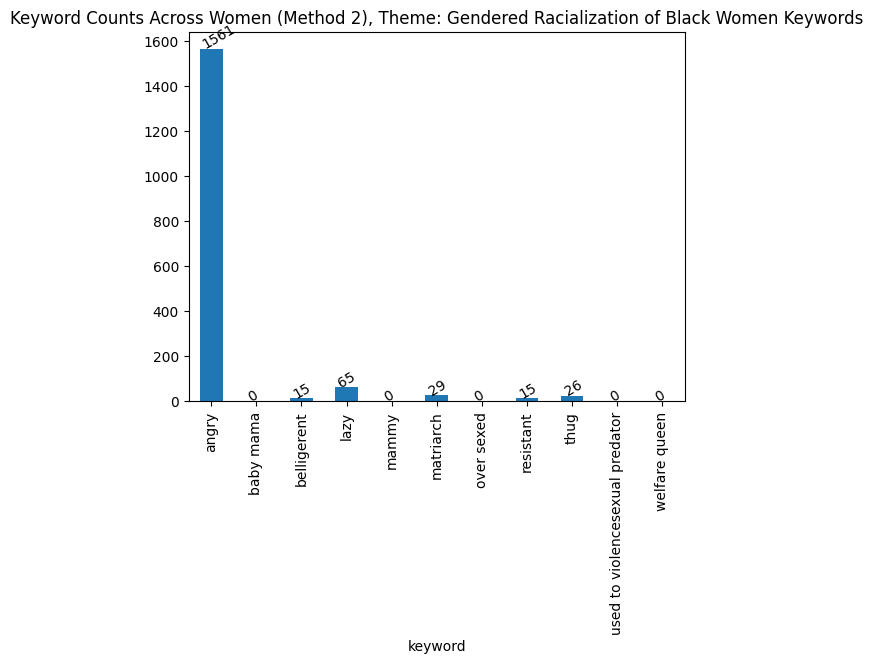

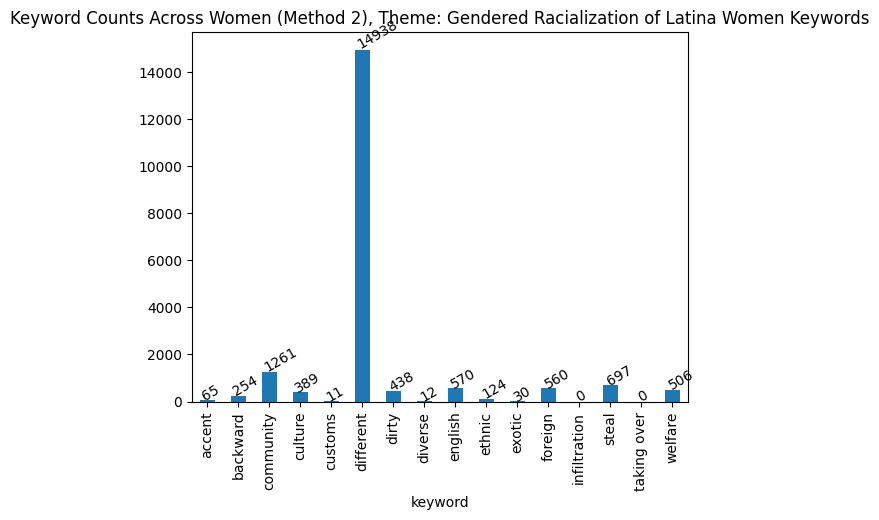

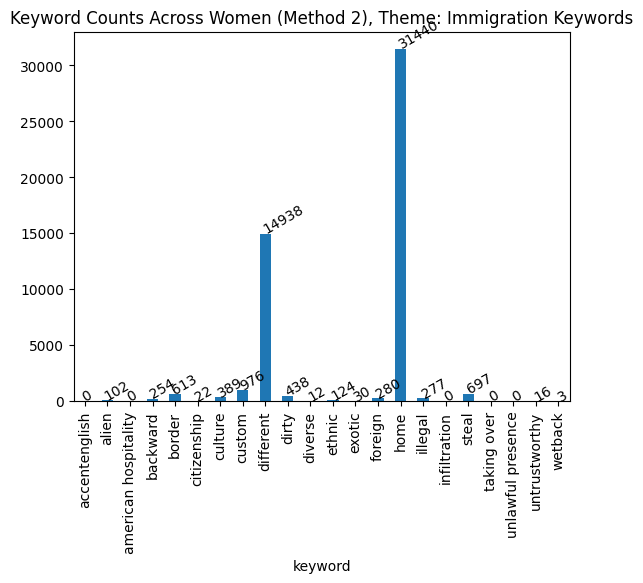

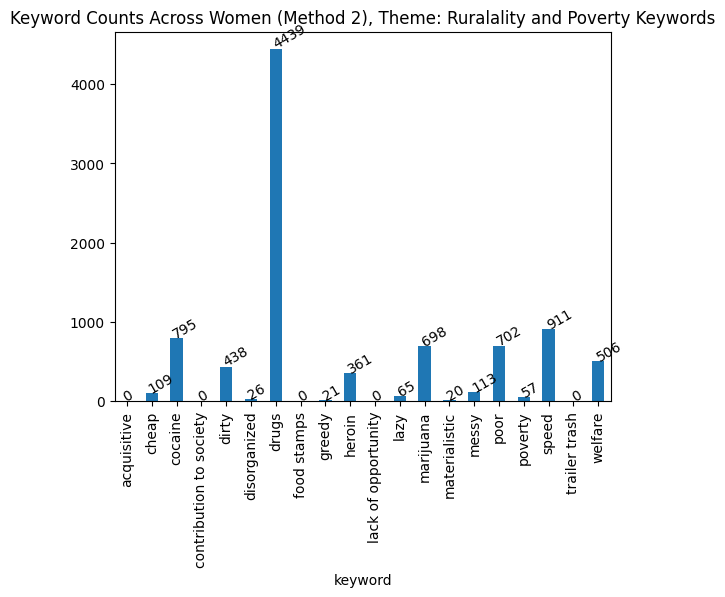

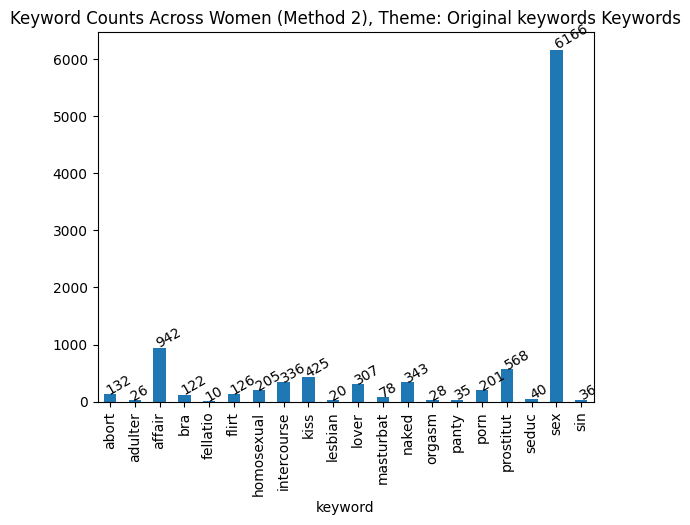

In [135]:

mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']

mask = df10['document_name'].isin(mens_transcript_titles)
women_only = df10[~mask]

for k in women_only.keyword_theme.unique():

  temp = women_only[women_only['keyword_theme'] == k]
  ax = temp.groupby('keyword')['count_method2'].sum().plot(kind='bar',  title= 'Keyword Counts Across Women (Method 2), Theme: ' +k +  ' Keywords')
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
  plt.show()

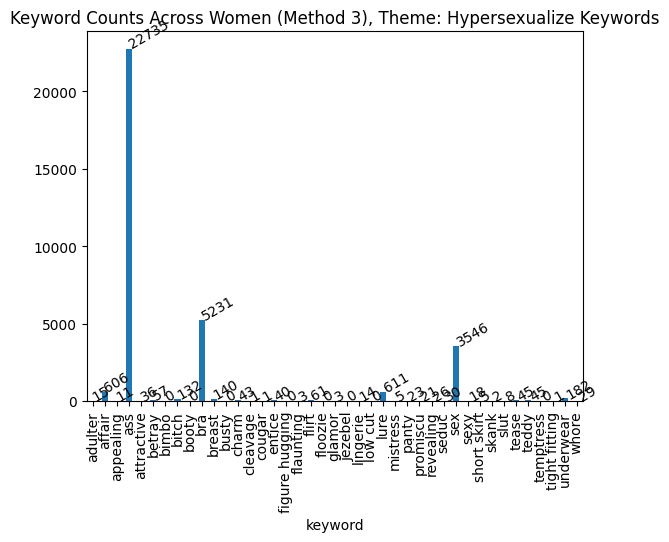

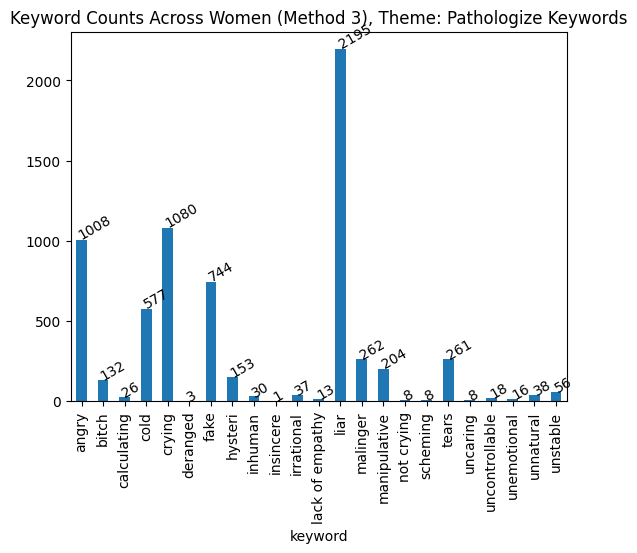

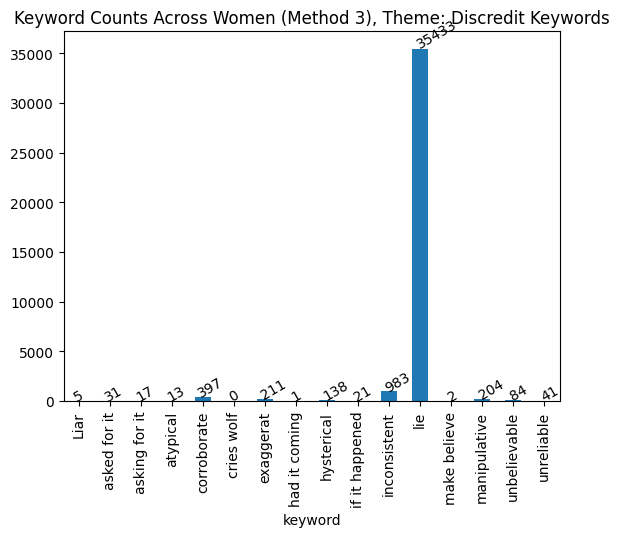

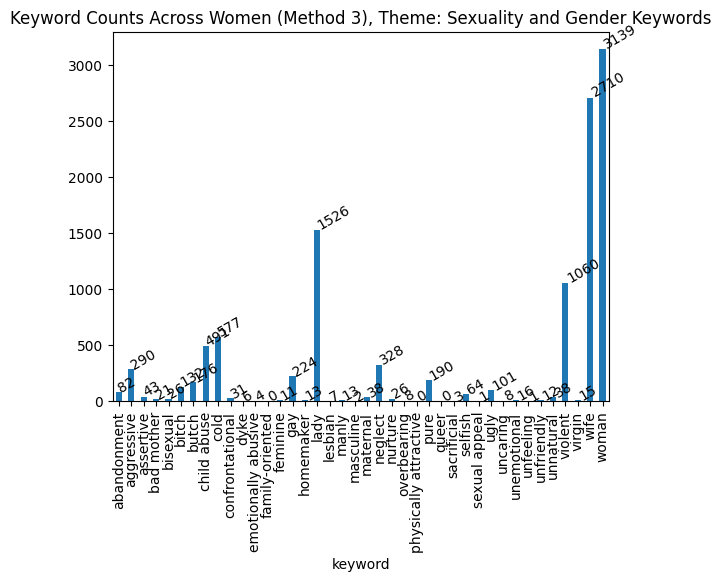

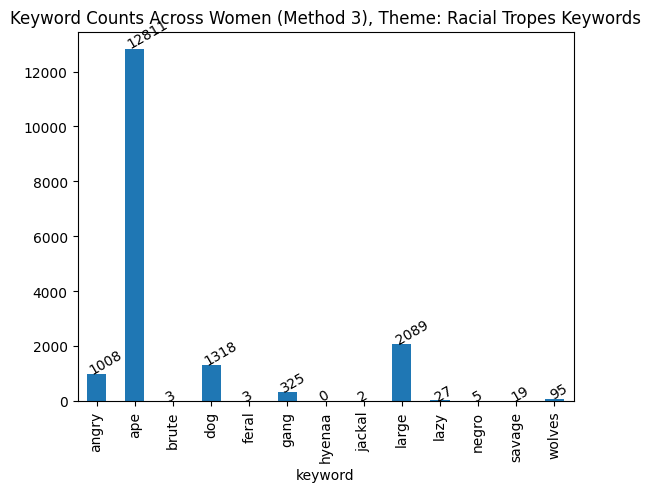

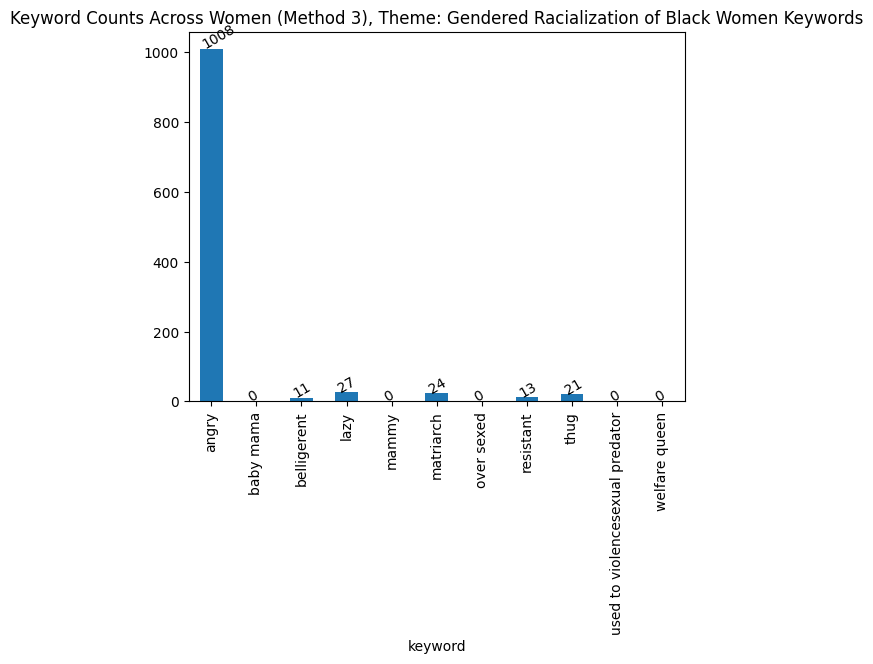

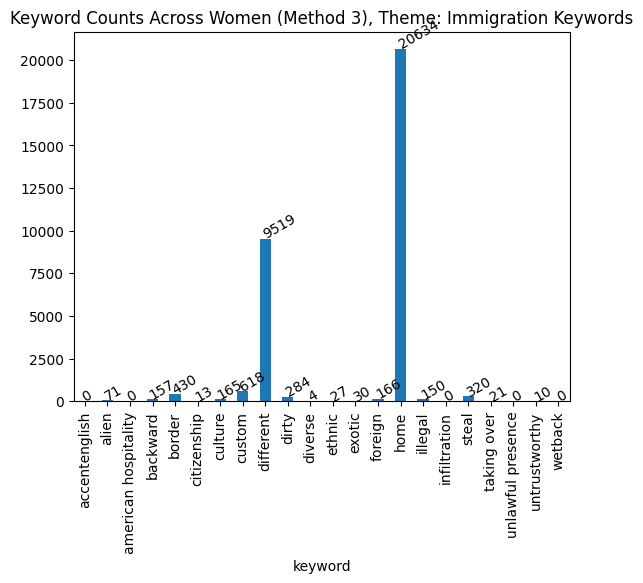

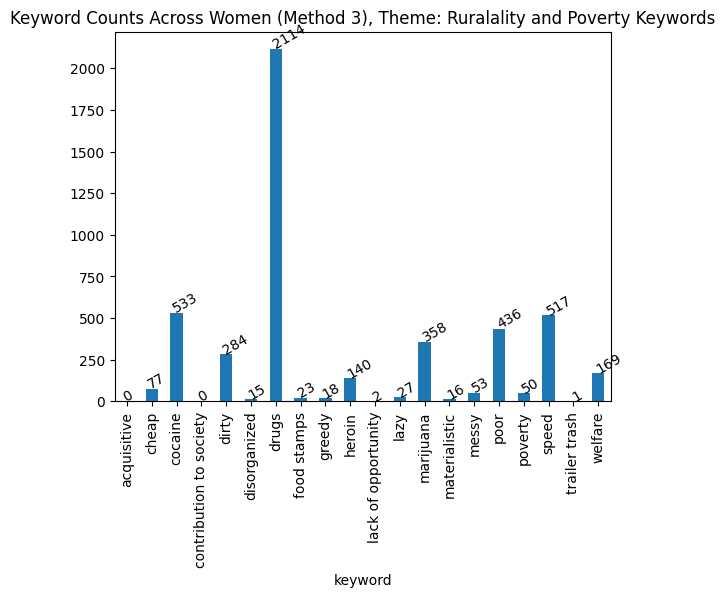

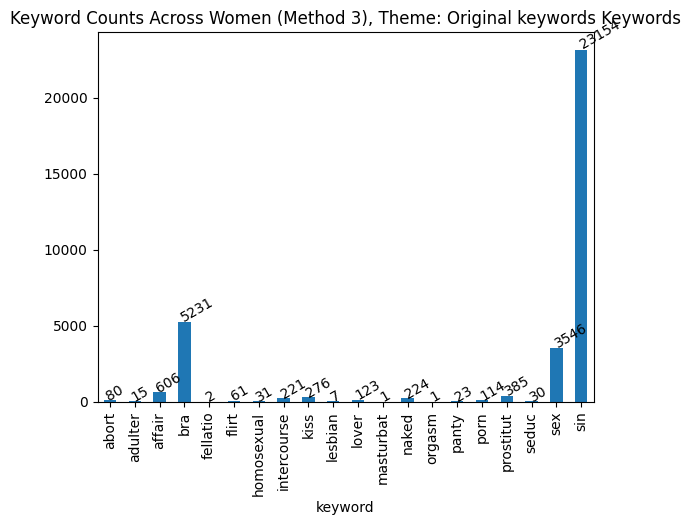

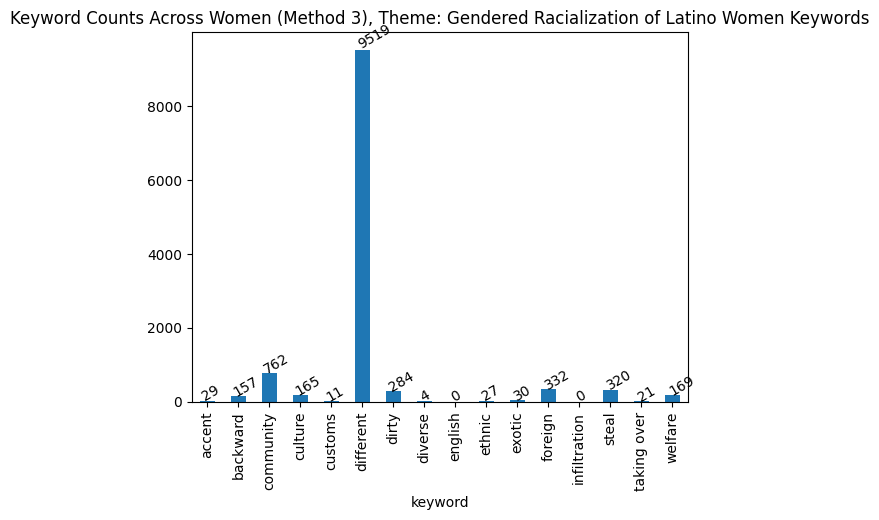

In [137]:
mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']

mask = df['document_name'].isin(mens_transcript_titles)
women_only = df[~mask]

for k in women_only.keyword_theme.unique():

  temp = women_only[women_only['keyword_theme'] == k]
  ax = temp.groupby('keyword')['count_method3'].sum().plot(kind='bar',  title= 'Keyword Counts Across Women (Method 3), Theme: ' +k +  ' Keywords')
  for p in ax.patches:
      ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
  plt.show()

In [96]:
passages_dict.shape

(430456, 5)

In [97]:
passages_dict.to_csv('passages_keywords.csv')

In [134]:
passages_dict[(passages_dict['keyword']=='sin') & (passages_dict['keyword_method']== 'Method 1')].shape


(63, 4)

In [152]:
mens_transcript_titles = ['James Pavatt.txt', 'James Dickerson.txt', 'John Allen.txt']
# women_only = df10[df10['document_name'] not in mens_transcript_titles]

mask = df10['document_name'].isin(mens_transcript_titles)
women_only = df10[~mask]

In [153]:
len(women_only.document_name.unique())

46

Graphs Depicting Keyword Count Calculations for Original List of Keywords

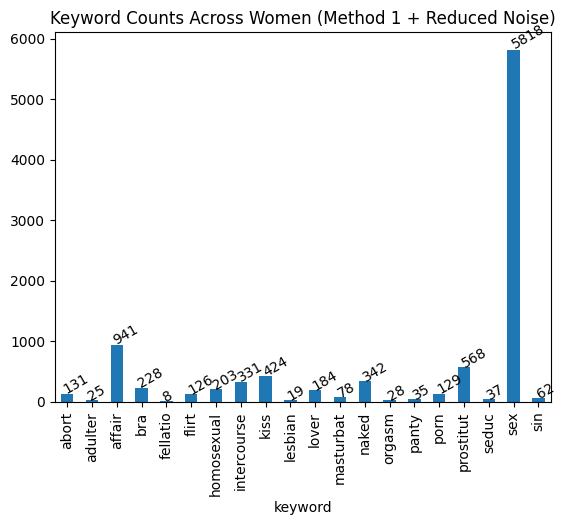

In [154]:
ax = women_only.groupby('keyword')['count_method1'].sum().plot(kind='bar',  title='Keyword Counts Across Women (Method 1 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)


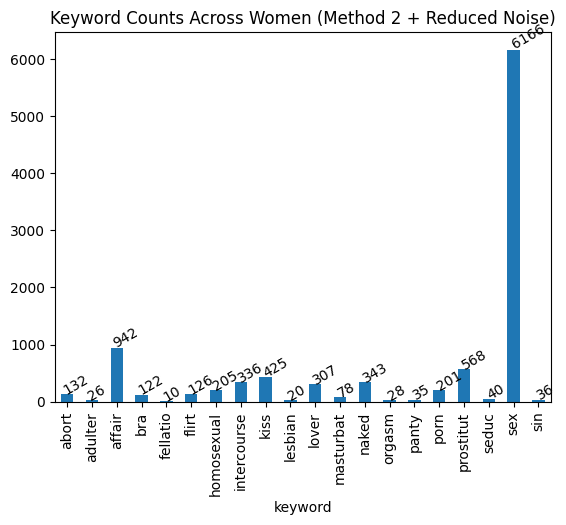

In [155]:
ax = women_only.groupby('keyword')['count_method2'].sum().plot(kind='bar', title= 'Keyword Counts Across Women (Method 2 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

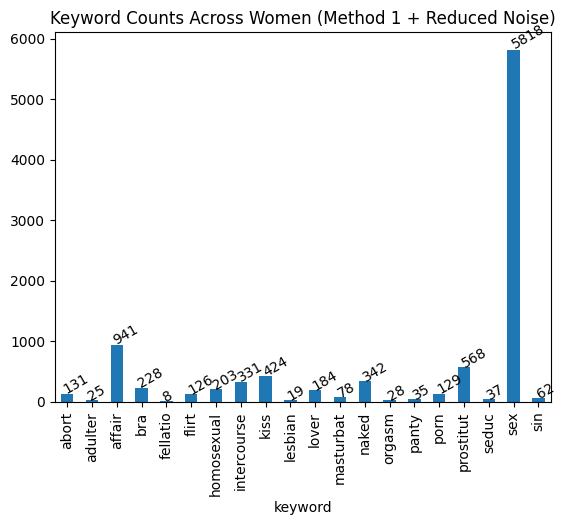

In [156]:
ax = women_only.groupby('keyword')['count_method1'].sum().plot(kind='bar',  title='Keyword Counts Across Women (Method 1 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)


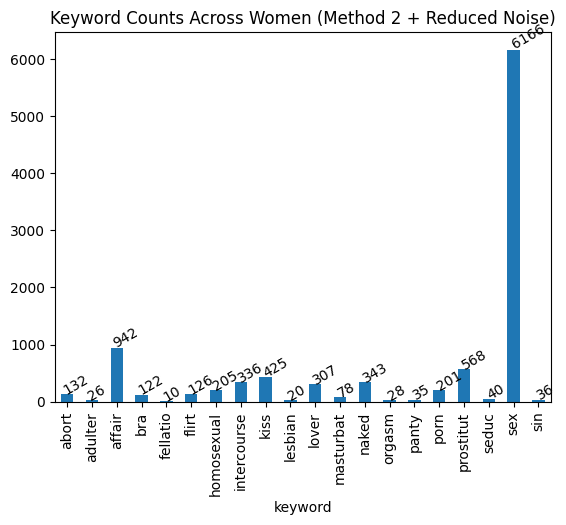

In [157]:
ax = women_only.groupby('keyword')['count_method2'].sum().plot(kind='bar', title= 'Keyword Counts Across Women (Method 2 + Reduced Noise)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

In [158]:
#sanity check- count of passages shoudl equal keyword counts match above,

m1_passages = passages_dict[passages_dict['keyword_method']=='Method 1']
m2_passages = passages_dict[passages_dict['keyword_method']=='Method 2']

mask = m1_passages['document_name'].isin(mens_transcript_titles)
m1_passages = m1_passages[~mask]

mask = m2_passages['document_name'].isin(mens_transcript_titles)
m2_passages = m2_passages[~mask]

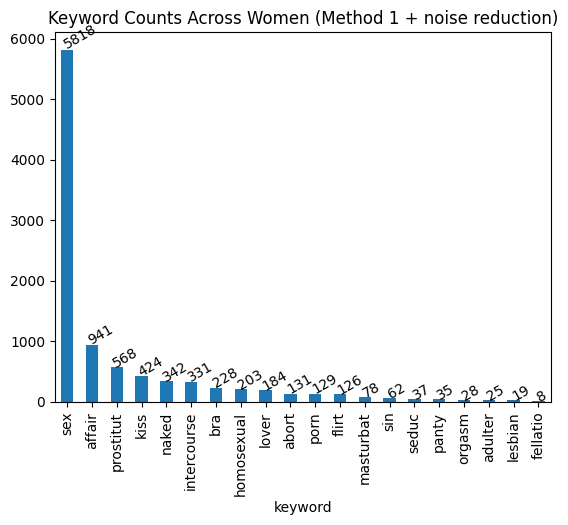

In [159]:
ax =m1_passages.keyword.value_counts().plot(kind='bar', title= 'Keyword Counts Across Women (Method 1 + noise reduction)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)

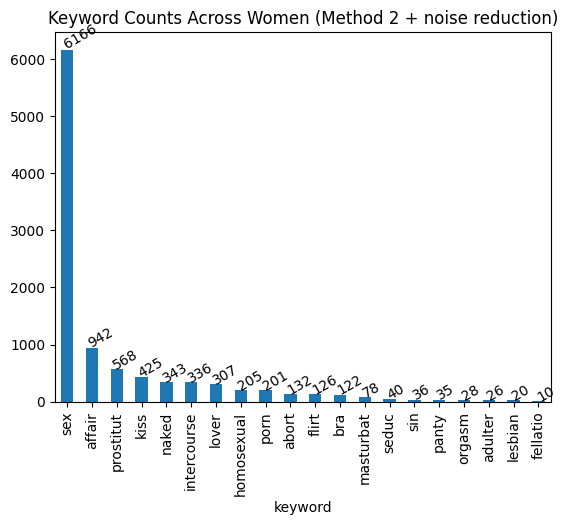

In [160]:
ax =m2_passages.keyword.value_counts().plot(kind='bar', title= 'Keyword Counts Across Women (Method 2 + noise reduction)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)

Individual Transcript analysis

In [172]:
#example passages from one defendat
Erica_Sheppard_passages = passages_dict[passages_dict['document_name']=='Erica Sheppard.txt']


In [173]:
Erica_Sheppard_passages.head()

,document_name,keyword,keyword_method,passage
13642,Erica Sheppard.txt,affair,Method 1,"to erica sheppard's life, is relevant; and it ..."
13643,Erica Sheppard.txt,affair,Method 2,"to erica sheppard's life, is relevant; and it ..."
13644,Erica Sheppard.txt,lover,Method 1,"address is 4655 wild indigo, no. 47. i have be..."
13645,Erica Sheppard.txt,lover,Method 1,"wild indigo, no. 47. i have been living with j..."
13646,Erica Sheppard.txt,lover,Method 2,"address is 4655 wild indigo, no. 47. i have be..."


In [174]:
Erica_Sheppard_passages.keyword.unique()

array(['affair', 'lover', 'sex', 'abort', 'homosexual', 'naked'],
      dtype=object)

In [ ]:
Erica_Sheppard_passages[Erica_Sheppard_passages['keyword']=='homosexual']

New Metadata Analysis

In [186]:
meta3 = pd.read_csv('/content/metadata/metadata_cleaning_cols_removed_women.csv')

In [193]:
race_name = meta3[['Name', 'Race/Ethnicity']]

In [194]:
race_name

,Name,Race/Ethnicity
0,Christie Michelle Scott,White
1,Heather Leavell Keaton,"Native American,White,Black"
2,Lisa Carpenter Graham,White
3,Patricia Blackmon,Black
4,Tierra Capri Gobble,White
5,Sammantha Allen,White
6,Shawna Forde,White
7,Wendi Andriano,White
8,Angelina Rodriguez,Latinx
9,Belinda Magaña,Latinx


In [196]:
keywords = df10
keywords['Name'] = keywords['document_name'].apply(lambda x:  x.replace('.txt', ""))
keywords

,document_name,keyword,count_method1,count_method2,Name
0,Maureen McDermott.txt,adulter,0,0,Maureen McDermott
1,Maureen McDermott.txt,affair,7,7,Maureen McDermott
2,Maureen McDermott.txt,prostitut,0,0,Maureen McDermott
3,Maureen McDermott.txt,lover,63,64,Maureen McDermott
4,Maureen McDermott.txt,seduc,0,0,Maureen McDermott
...,...,...,...,...,...
975,Lisa Chamberlin.txt,bra,0,0,Lisa Chamberlin
976,Lisa Chamberlin.txt,naked,3,3,Lisa Chamberlin
977,Lisa Chamberlin.txt,porn,0,0,Lisa Chamberlin
978,Lisa Chamberlin.txt,masturbat,0,0,Lisa Chamberlin


In [202]:
len(sorted(keywords.Name.unique()))

49

In [204]:
sorted(race_name.Name.unique())

['Angelina Rodriguez',
 'Antoinette Frank',
 'Belinda Magaña',
 'Blanche Taylor Moore',
 'Brenda E. Andrew',
 'Brittany Holberg',
 'Brooke Rottiers',
 'Carlette Parker ',
 'Catherine Thompson',
 'Cathy Sarinana',
 'Cherie Rhoades',
 'Christa Pike',
 'Christie Michelle Scott',
 'Cynthia Coffman',
 'Darlie Routier',
 'Donna Marie Roberts',
 'Erica Sheppard',
 'Heather Leavell Keaton',
 'Janeen Snyder',
 'Kerry Dalton',
 'Kimberly Cargill',
 'Linda Carty',
 'Lisa Carpenter Graham',
 'Lisa Jo Chamberlin',
 'Lorraine Alison Hunter',
 'Manling Williams',
 'Margaret Allen',
 'Maria Alfaro',
 'Maureen McDermott',
 'Melissa Lucio',
 'Michelle Michaud',
 'Michelle Sue Tharp',
 'Patricia Blackmon',
 'Robin Lee Row',
 'Sammantha Allen',
 'Shawna Forde',
 'Socorro Caro',
 'Susan Eubanks',
 'Tanya Nelson',
 'Taylor Parker',
 'Tierra Capri Gobble',
 'Tiffany Cole',
 'Tiffany Moss',
 'Tina Brown',
 'Valerie Martin',
 'Veronica Gonzales',
 'Virginia Caudill',
 'Wendi Andriano']

In [205]:
merged_df = keywords.merge(race_name, how = 'inner', on = ['Name'])


In [210]:
merged_df.head()

,document_name,keyword,count_method1,count_method2,Name,Race/Ethnicity
0,Maureen McDermott.txt,adulter,0,0,Maureen McDermott,White
1,Maureen McDermott.txt,affair,7,7,Maureen McDermott,White
2,Maureen McDermott.txt,prostitut,0,0,Maureen McDermott,White
3,Maureen McDermott.txt,lover,63,64,Maureen McDermott,White
4,Maureen McDermott.txt,seduc,0,0,Maureen McDermott,White


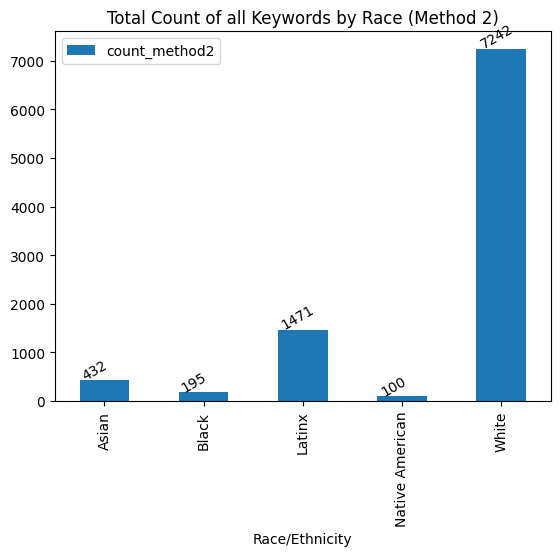

In [215]:
ax = merged_df.groupby(['Race/Ethnicity'])[['keyword','count_method2']].sum().plot(kind='bar', title= 'Total Count of all Keywords by Race (Method 2)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

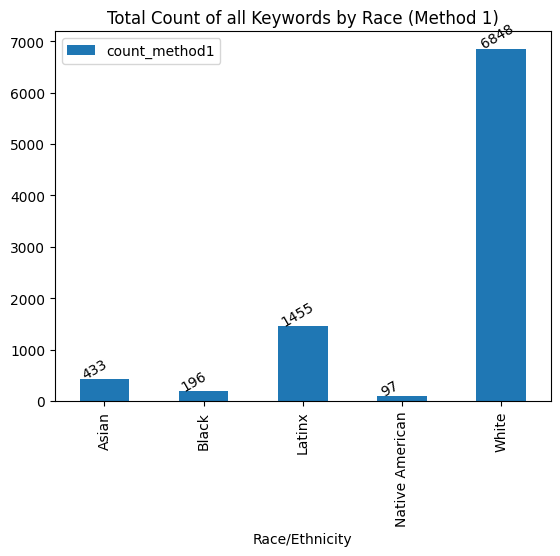

In [217]:
ax = merged_df.groupby(['Race/Ethnicity'])[['keyword','count_method1']].sum().plot(kind='bar', title= 'Total Count of all Keywords by Race (Method 1)')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), rotation=30)
    # ax.bar_label(rects1, padding=3, rotation=90)

In [219]:
import pandas as pd
import matplotlib.pyplot as plt

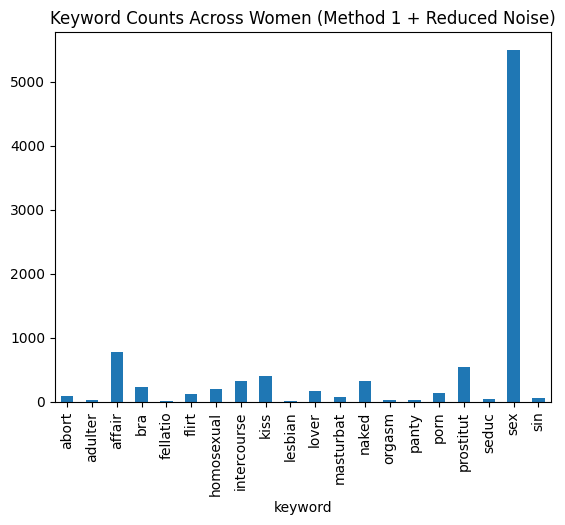

In [228]:
ax = merged_df.groupby(['keyword'])['count_method1'].sum().plot(kind='bar',  title='Keyword Counts Across Women (Method 1 + Reduced Noise)', stacked=True)


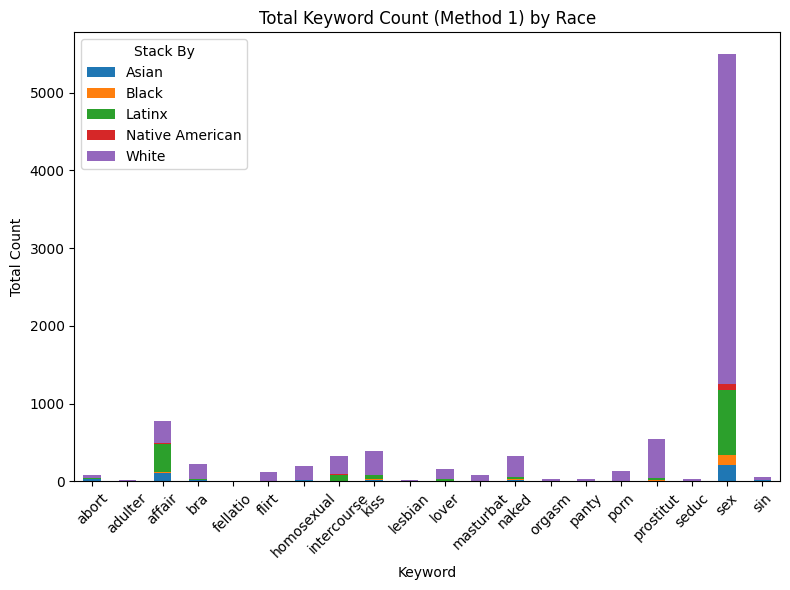

In [236]:
pivot_df = merged_df.pivot_table(index='keyword', columns='Race/Ethnicity', values='count_method1', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Total Keyword Count (Method 1) by Race')
plt.xlabel('Keyword')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Stack By')
plt.tight_layout()
plt.show()

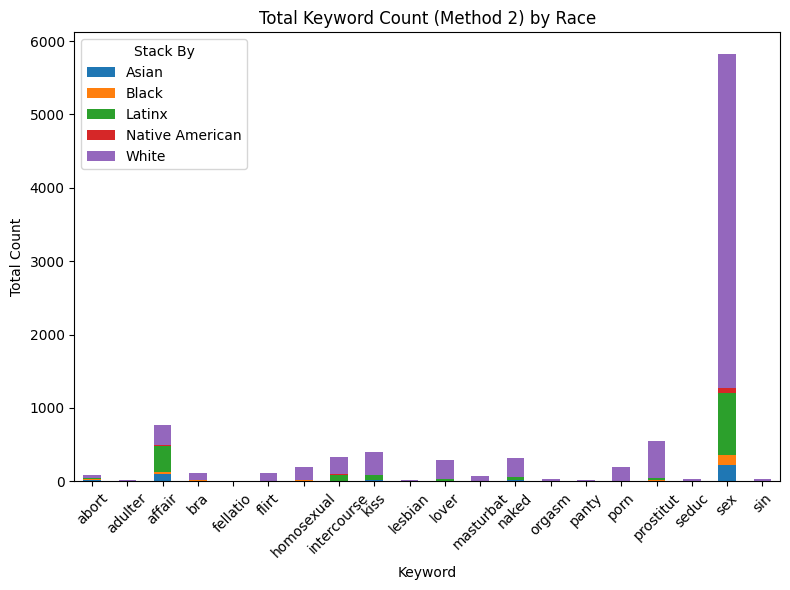

In [237]:
pivot_df = merged_df.pivot_table(index='keyword', columns='Race/Ethnicity', values='count_method2', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Total Keyword Count (Method 2) by Race')
plt.xlabel('Keyword')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.legend(title='Stack By')
plt.tight_layout()